In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [24]:
# Y = 2X1^2 + 1.5X2^2 + 0.5X1X2 + 3X1 - 2X2 + 1
X1 = np.linspace(-5, 5, 50)
X2 = np.linspace(-5, 5, 50)
print(X1.shape, X2.shape)

(50,) (50,)


In [25]:
print(X1[:5])
print(X2[:5])

[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347]
[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347]


In [26]:
X1, X2 = np.meshgrid(X1, X2)
print(X1.shape, X2.shape)
print(X1[:5, :5])

(50, 50) (50, 50)
[[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347]
 [-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347]
 [-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347]
 [-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347]
 [-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347]]


In [27]:
X1_flat = X1.flatten()
X2_flat = X2.flatten()
print(X1_flat.shape, X2_flat.shape)

(2500,) (2500,)


In [31]:
Y = 2*X1_flat**2 + 1.5*X2_flat**2 + 0.5*X1_flat*X2_flat + 3*X1_flat - 2*X2_flat + 1
print(Y.shape)
Y_noise = Y + np.random.normal(0, 2, len(Y))

(2500,)


Text(0.5, 0.92, 'True Y without noise')

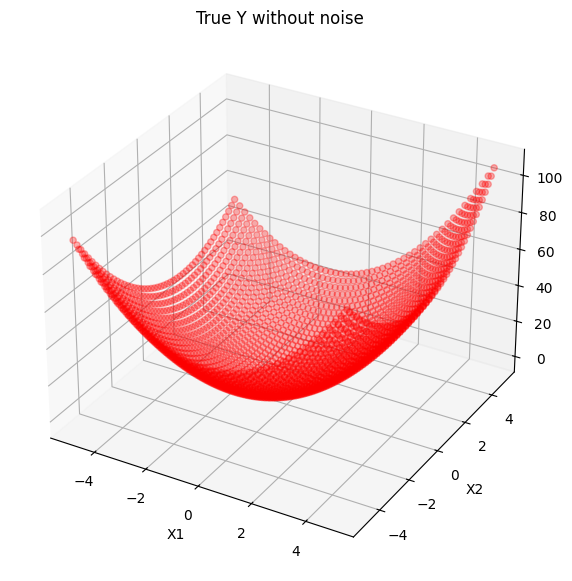

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(X1_flat, X2_flat, Y, c='r', marker='o', alpha=0.3)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.set_title('True Y without noise')

Text(0.5, 0.92, 'True Y without noise')

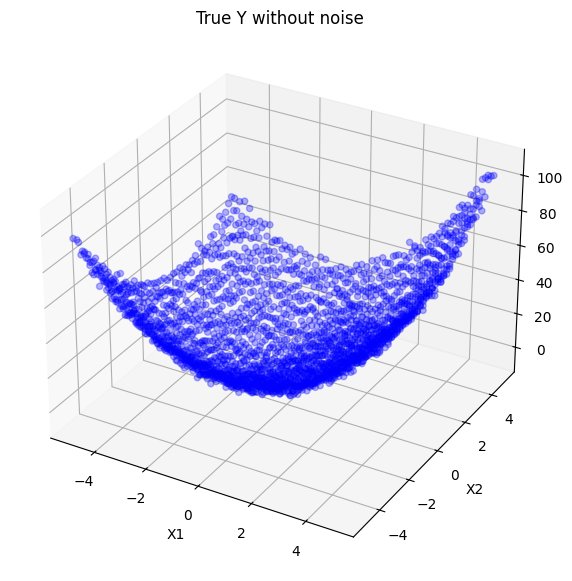

In [33]:
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(X1_flat, X2_flat, Y_noise, c='b', marker='o', alpha=0.3)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.set_title('True Y without noise')

In [35]:
from sklearn.preprocessing import StandardScaler
scaler_x1 = StandardScaler()
scaler_x2 = StandardScaler()
scaler_y = StandardScaler()
X1_scaled = scaler_x1.fit_transform(X1_flat.reshape(-1, 1)).flatten()
X2_scaled = scaler_x2.fit_transform(X2_flat.reshape(-1, 1)).flatten()
Y_scaled = scaler_y.fit_transform(Y_noise.reshape(-1, 1)).flatten()

print(X1_scaled.shape, X2_scaled.shape, Y_scaled.shape)

(2500,) (2500,) (2500,)


In [36]:
print(X1_scaled[:5], X2_scaled[:5], Y_scaled[:5])

[-1.69774938 -1.62845348 -1.55915759 -1.4898617  -1.4205658 ] [-1.69774938 -1.69774938 -1.69774938 -1.69774938 -1.69774938] [2.89562897 2.83763751 2.60017261 2.35230631 2.26768889]


In [ ]:
model = Sequential(
    [
        Dense(64, input_shape=(2,), activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation=None)
    ]
)

model.compile(optimizer='adam', loss='mse')
model.summary()

In [40]:
X_scaled = np.column_stack((X1_scaled, X2_scaled))
print(X_scaled.shape)
model_logs = model.fit(X_scaled, Y_scaled, epochs=50, verbose=1)

(2500, 2)
Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.8431 
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.3011
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.0338
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.0224
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.0160
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.0132
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.0126
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.0115
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.0133
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.0102
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.0111
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.0116
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.0101
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 0.0095
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 480u

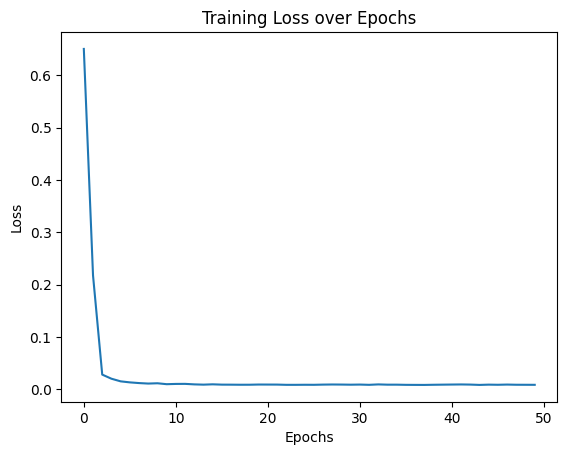

In [41]:
# draw loss
plt.plot(model_logs.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [ ]:
Y_pred_scaled = model.predict(X_scaled)
Y_pred = scaler_y.inverse_transform(Y_pred_scaled).flatten()
print(Y_pred.shape)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
(2500,)


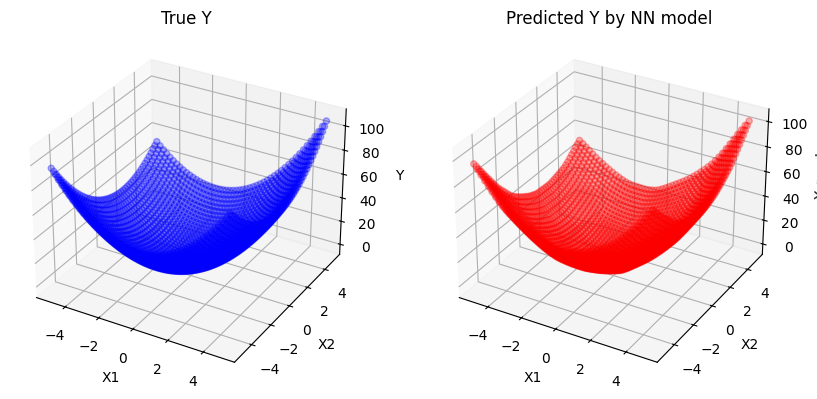

In [43]:
fig = plt.figure(figsize=(10, 7))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X1_flat, X2_flat, Y, c='b', marker='o', alpha=0.3)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.set_title('True Y')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X1_flat, X2_flat, Y_pred, c='r', marker='o', alpha=0.3)
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y_pred')
ax2.set_title('Predicted Y by NN model')
plt.show()